In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('shopping_trends.csv')
data=dataset
dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
dataset.drop('Customer ID',axis=1,inplace=True)

In [5]:
dataset.isna().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
dataset['Gender']=dataset['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
dataset['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [9]:
category_map = {
    'Blouse': 'Clothing', 'Sweater': 'Clothing', 'Jeans': 'Clothing', 'Shirt': 'Clothing', 
    'Shorts': 'Clothing', 'Coat': 'Clothing', 'Dress': 'Clothing', 'Skirt': 'Clothing', 
    'Jacket': 'Clothing', 'Hoodie': 'Clothing', 'T-shirt': 'Clothing','Pants': 'Clothing',
    'Sandals': 'Footwear', 'Sneakers': 'Footwear', 'Shoes': 'Footwear', 'Boots': 'Footwear', 'Socks': 'Footwear',
    'Handbag': 'Accessories', 'Sunglasses': 'Accessories', 'Jewelry': 'Accessories', 
    'Scarf': 'Accessories', 'Hat': 'Accessories', 'Backpack': 'Accessories', 
    'Belt': 'Accessories', 'Gloves': 'Accessories',
}
dataset['Item Purchased'] = dataset['Item Purchased'].map(category_map)


In [10]:
dataset['Item Purchased'].unique()

array(['Clothing', 'Footwear', 'Accessories'], dtype=object)

In [11]:
ohe_2=OneHotEncoder(sparse_output=False)
a=ohe_2.fit_transform(dataset[['Item Purchased']])
a=pd.DataFrame(a,columns=ohe_2.get_feature_names_out())

In [12]:
dataset=pd.concat([dataset.iloc[:,:2],a,dataset.iloc[:,3:]],axis=1)

In [13]:
dataset['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [14]:
dataset['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [15]:
ohe_1=OneHotEncoder(sparse_output=False)
a=ohe_1.fit_transform(dataset[['Category']])

In [16]:
a=pd.DataFrame(a,columns=ohe_1.get_feature_names_out())

In [17]:
dataset=pd.concat([dataset.iloc[:,:5],a,dataset.iloc[:,6:]],axis=True)

In [18]:
dataset['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [19]:
locat=dataset['Location'].value_counts()
locat

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

In [20]:
dataset['Location']=dataset['Location'].map(locat)

In [21]:
dataset['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [22]:
dataset['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

In [23]:
sizes={
    'S':0,
    'M':1,
    'L':2,
    'XL':3
}

In [24]:
dataset['Size']=dataset['Size'].map(sizes)

In [25]:
dataset['Color'].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [26]:
dataset['Color'] = dataset['Color'].map(dataset['Color'].value_counts())

In [27]:
dataset.shape

(3900, 23)

In [28]:
dataset['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [29]:
dataset['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [30]:
ohe_3=OneHotEncoder(sparse_output=False)
a=ohe_3.fit_transform(dataset[['Season']])
a=pd.DataFrame(a,columns=ohe_3.get_feature_names_out())

In [31]:
dataset=pd.concat([dataset.iloc[:,:13],a,dataset.iloc[:,14:]],axis=1)

In [32]:
dataset['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
dataset['Subscription Status']=dataset['Subscription Status'].apply(lambda x: 1 if x=='Yes' else 0)

In [34]:
dataset['Subscription Status'].unique()

array([1, 0], dtype=int64)

In [35]:
dataset.shape

(3900, 26)

In [36]:
dataset['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [37]:
dataset['Payment Method'].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [38]:
dataset['Payment Method']=dataset['Payment Method'].map(dataset['Payment Method'].value_counts())

In [39]:
dataset.iloc[:5,19:]

,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,696,Express,Yes,Yes,14,Venmo,Fortnightly
1,632,Express,Yes,Yes,2,Cash,Fortnightly
2,648,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,638,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,648,Free Shipping,Yes,Yes,31,PayPal,Annually


In [40]:
dataset['Shipping Type'].unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

In [41]:
dataset['Shipping Type'].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [42]:
dataset['Shipping Type']=dataset['Shipping Type'].map(dataset['Shipping Type'].value_counts())

In [43]:
dataset.iloc[:5,19:]

,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,696,646,Yes,Yes,14,Venmo,Fortnightly
1,632,646,Yes,Yes,2,Cash,Fortnightly
2,648,675,Yes,Yes,23,Credit Card,Weekly
3,638,648,Yes,Yes,49,PayPal,Weekly
4,648,675,Yes,Yes,31,PayPal,Annually


In [44]:
dataset['Discount Applied']=dataset['Discount Applied'].apply(lambda x:1 if x=='Yes' else 0)

In [45]:
dataset['Discount Applied'].value_counts()

Discount Applied
0    2223
1    1677
Name: count, dtype: int64

In [46]:
dataset['Promo Code Used']=dataset['Promo Code Used'].apply(lambda x : 1 if x=='Yes' else 0)

In [47]:
dataset['Promo Code Used'].value_counts()

Promo Code Used
0    2223
1    1677
Name: count, dtype: int64

In [48]:
dataset['Preferred Payment Method'].value_counts()

Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [49]:
dataset['Preferred Payment Method']=dataset['Preferred Payment Method'].map(dataset['Preferred Payment Method'].value_counts())

In [50]:
dataset['Preferred Payment Method'].unique()

array([634, 670, 671, 677, 612, 636], dtype=int64)

In [51]:
dataset['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [52]:
dataset['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [53]:
dataset['Frequency of Purchases']=dataset['Frequency of Purchases'].map(dataset['Frequency of Purchases'].value_counts())

In [54]:
dataset.iloc[:7,:14]

,Age,Gender,Item Purchased_Accessories,Item Purchased_Clothing,Item Purchased_Footwear,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Purchase Amount (USD),Location,Size,Color,Season_Fall
0,55,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53,79,2,159,0.0
1,19,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,64,77,2,158,0.0
2,50,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,73,72,0,158,0.0
3,21,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,90,63,1,158,0.0
4,45,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49,74,1,145,0.0
5,46,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20,71,1,142,0.0
6,63,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,85,96,1,159,1.0


In [55]:
dataset.iloc[:10,:13]

,Age,Gender,Item Purchased_Accessories,Item Purchased_Clothing,Item Purchased_Footwear,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Purchase Amount (USD),Location,Size,Color
0,55,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53,79,2,159
1,19,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,64,77,2,158
2,50,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,73,72,0,158
3,21,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,90,63,1,158
4,45,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,49,74,1,145
5,46,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20,71,1,142
6,63,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,85,96,1,159
7,27,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,34,84,2,153
8,26,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,97,81,2,173
9,57,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,31,81,1,153


In [56]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.00,70.0
Gender,3900.0,0.680000,0.466536,0.0,0.0,1.0,1.00,1.0
Item Purchased_Accessories,3900.0,0.317949,0.465739,0.0,0.0,0.0,1.00,1.0
Item Purchased_Clothing,3900.0,0.487692,0.499913,0.0,0.0,0.0,1.00,1.0
Item Purchased_Footwear,3900.0,0.194359,0.395757,0.0,0.0,0.0,0.00,1.0
Category_Accessories,3900.0,0.317949,0.465739,0.0,0.0,0.0,1.00,1.0
Category_Clothing,3900.0,0.445385,0.497072,0.0,0.0,0.0,1.00,1.0
Category_Footwear,3900.0,0.153590,0.360601,0.0,0.0,0.0,0.00,1.0
Category_Outerwear,3900.0,0.083077,0.276034,0.0,0.0,0.0,0.00,1.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.00,100.0


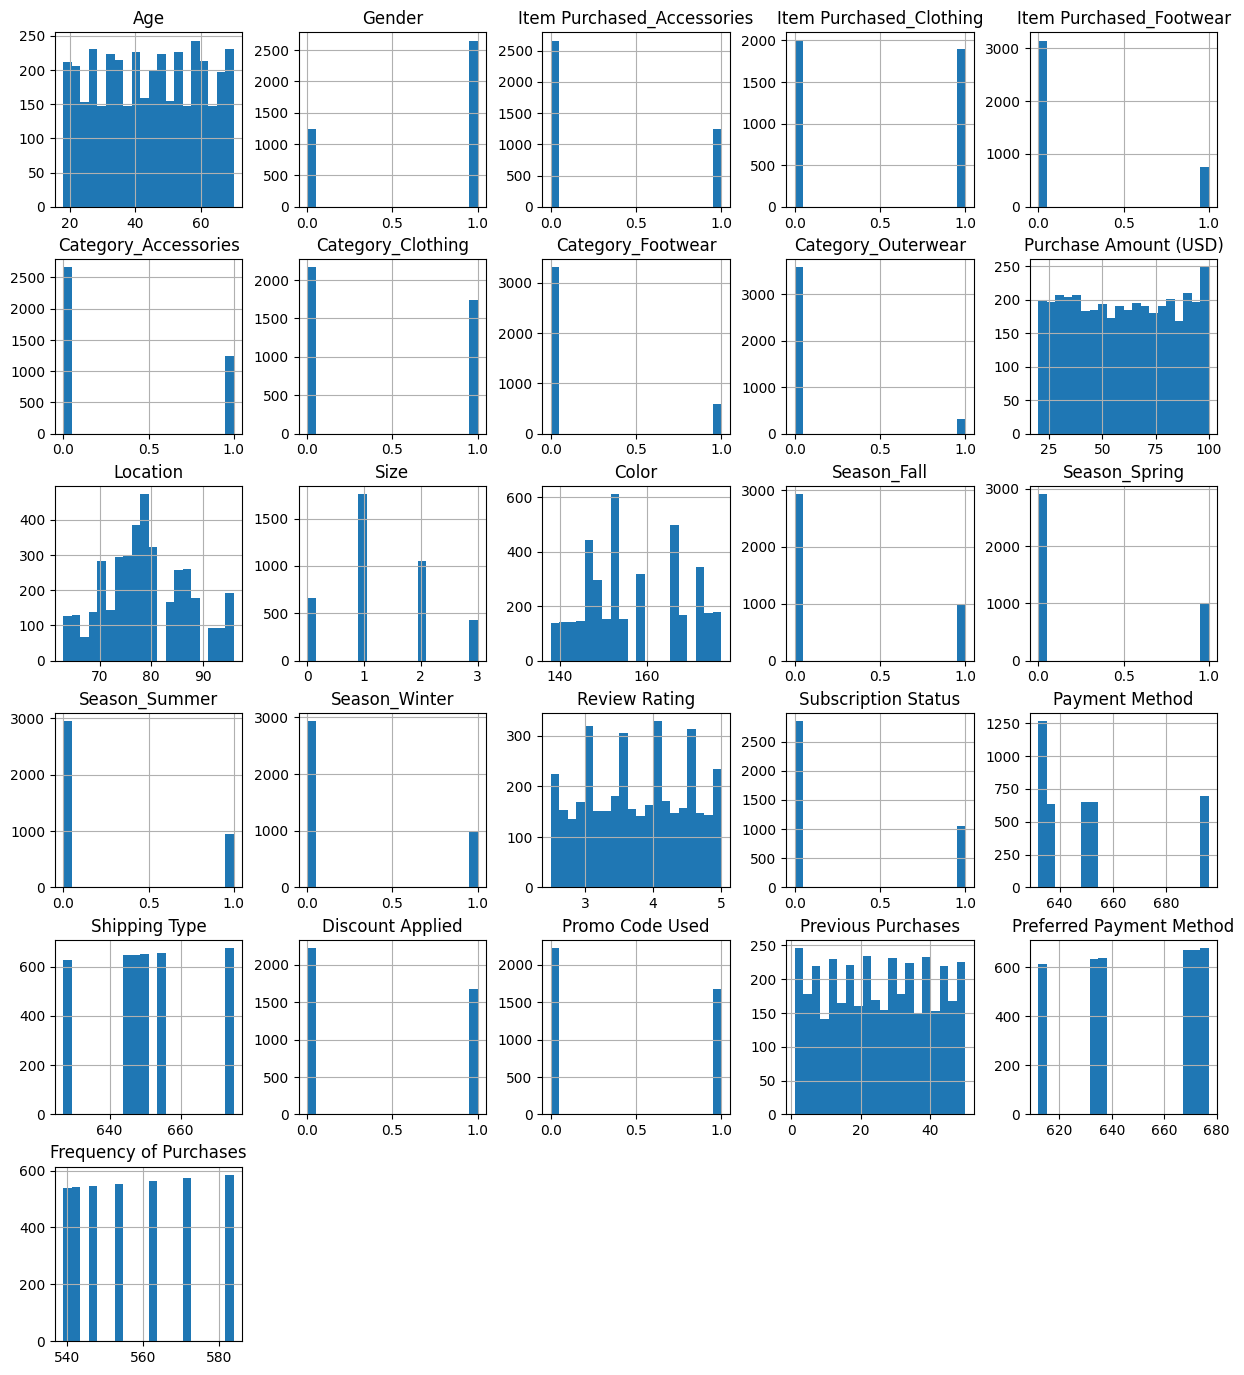

In [57]:
dataset.hist(figsize=(15,17),bins=20)
plt.show()

In [58]:
dataset.columns

Index(['Age', 'Gender', 'Item Purchased_Accessories',
       'Item Purchased_Clothing', 'Item Purchased_Footwear',
       'Category_Accessories', 'Category_Clothing', 'Category_Footwear',
       'Category_Outerwear', 'Purchase Amount (USD)', 'Location', 'Size',
       'Color', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Review Rating', 'Subscription Status',
       'Payment Method', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler,normalize
column_names=['Age','Purchase Amount (USD)','Location','Color','Review Rating','Payment Method','Shipping Type','Previous Purchases','Preferred Payment Method',
       'Frequency of Purchases']
dataset[column_names]=normalize(dataset[column_names])

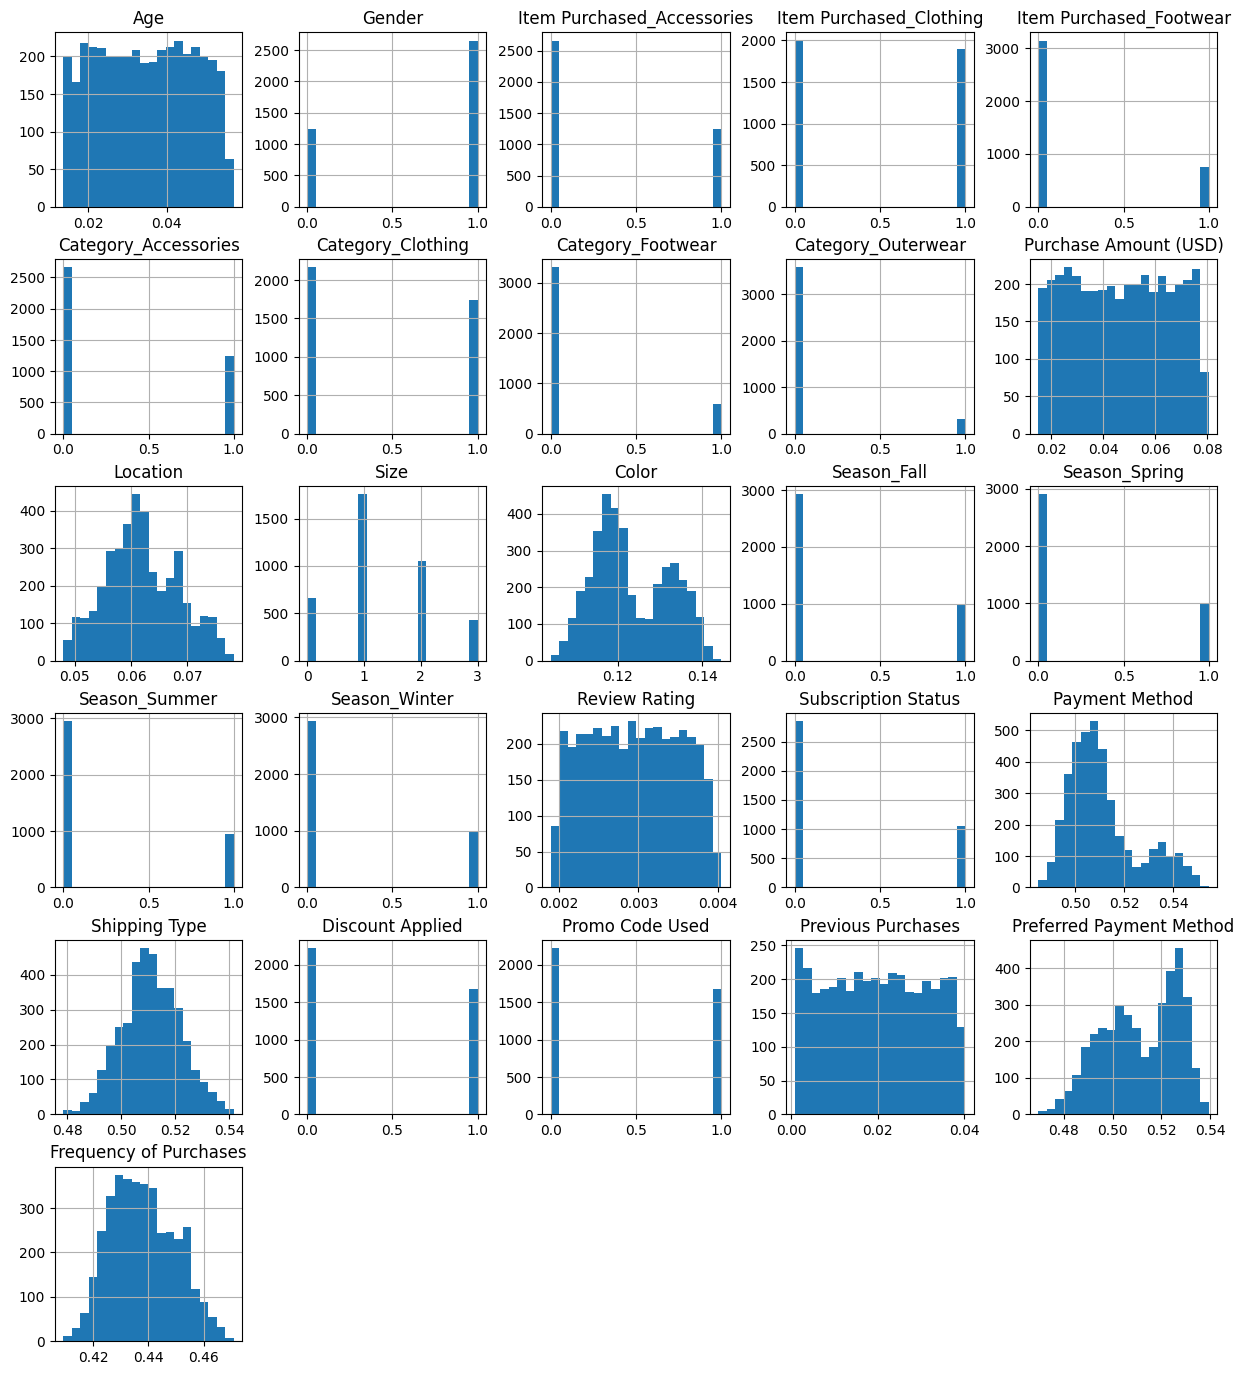

In [60]:
dataset.hist(figsize=(15,17),bins=20)
plt.show()

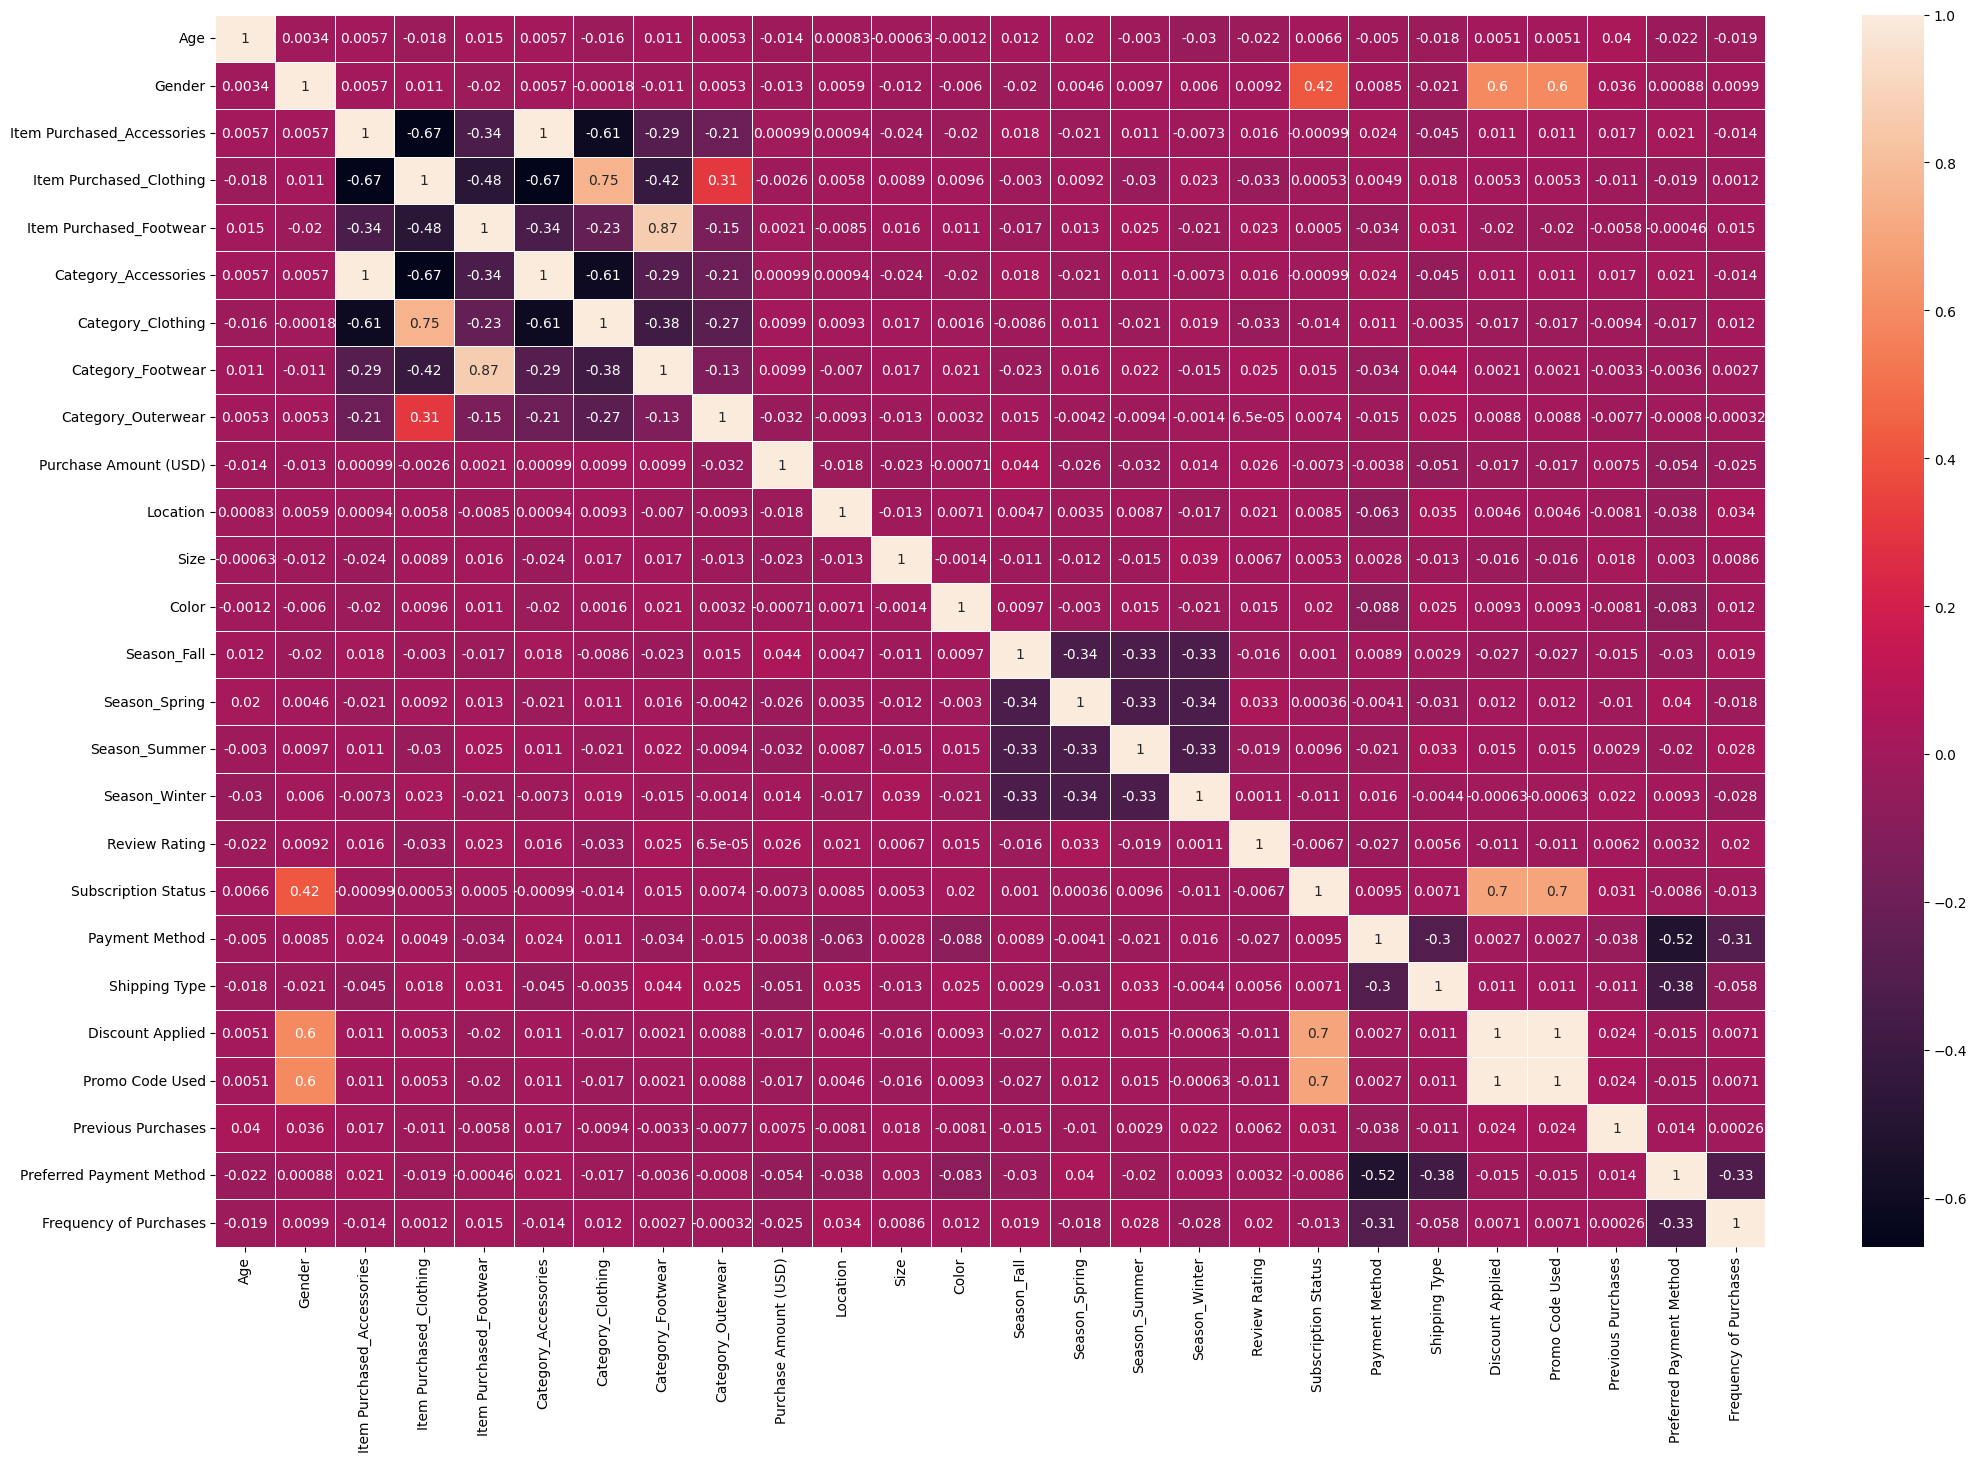

In [61]:
import seaborn as sns
plt.figure(figsize=(25, 16))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5)
plt.show()

In [62]:
df=dataset.drop(columns=['Color','Promo Code Used','Subscription Status','Category_Footwear','Category_Clothing','Item Purchased_Accessories'],axis=1)
dataset=dataset.drop(columns=['Color','Promo Code Used','Subscription Status','Category_Footwear','Category_Clothing','Item Purchased_Accessories'],axis=1)

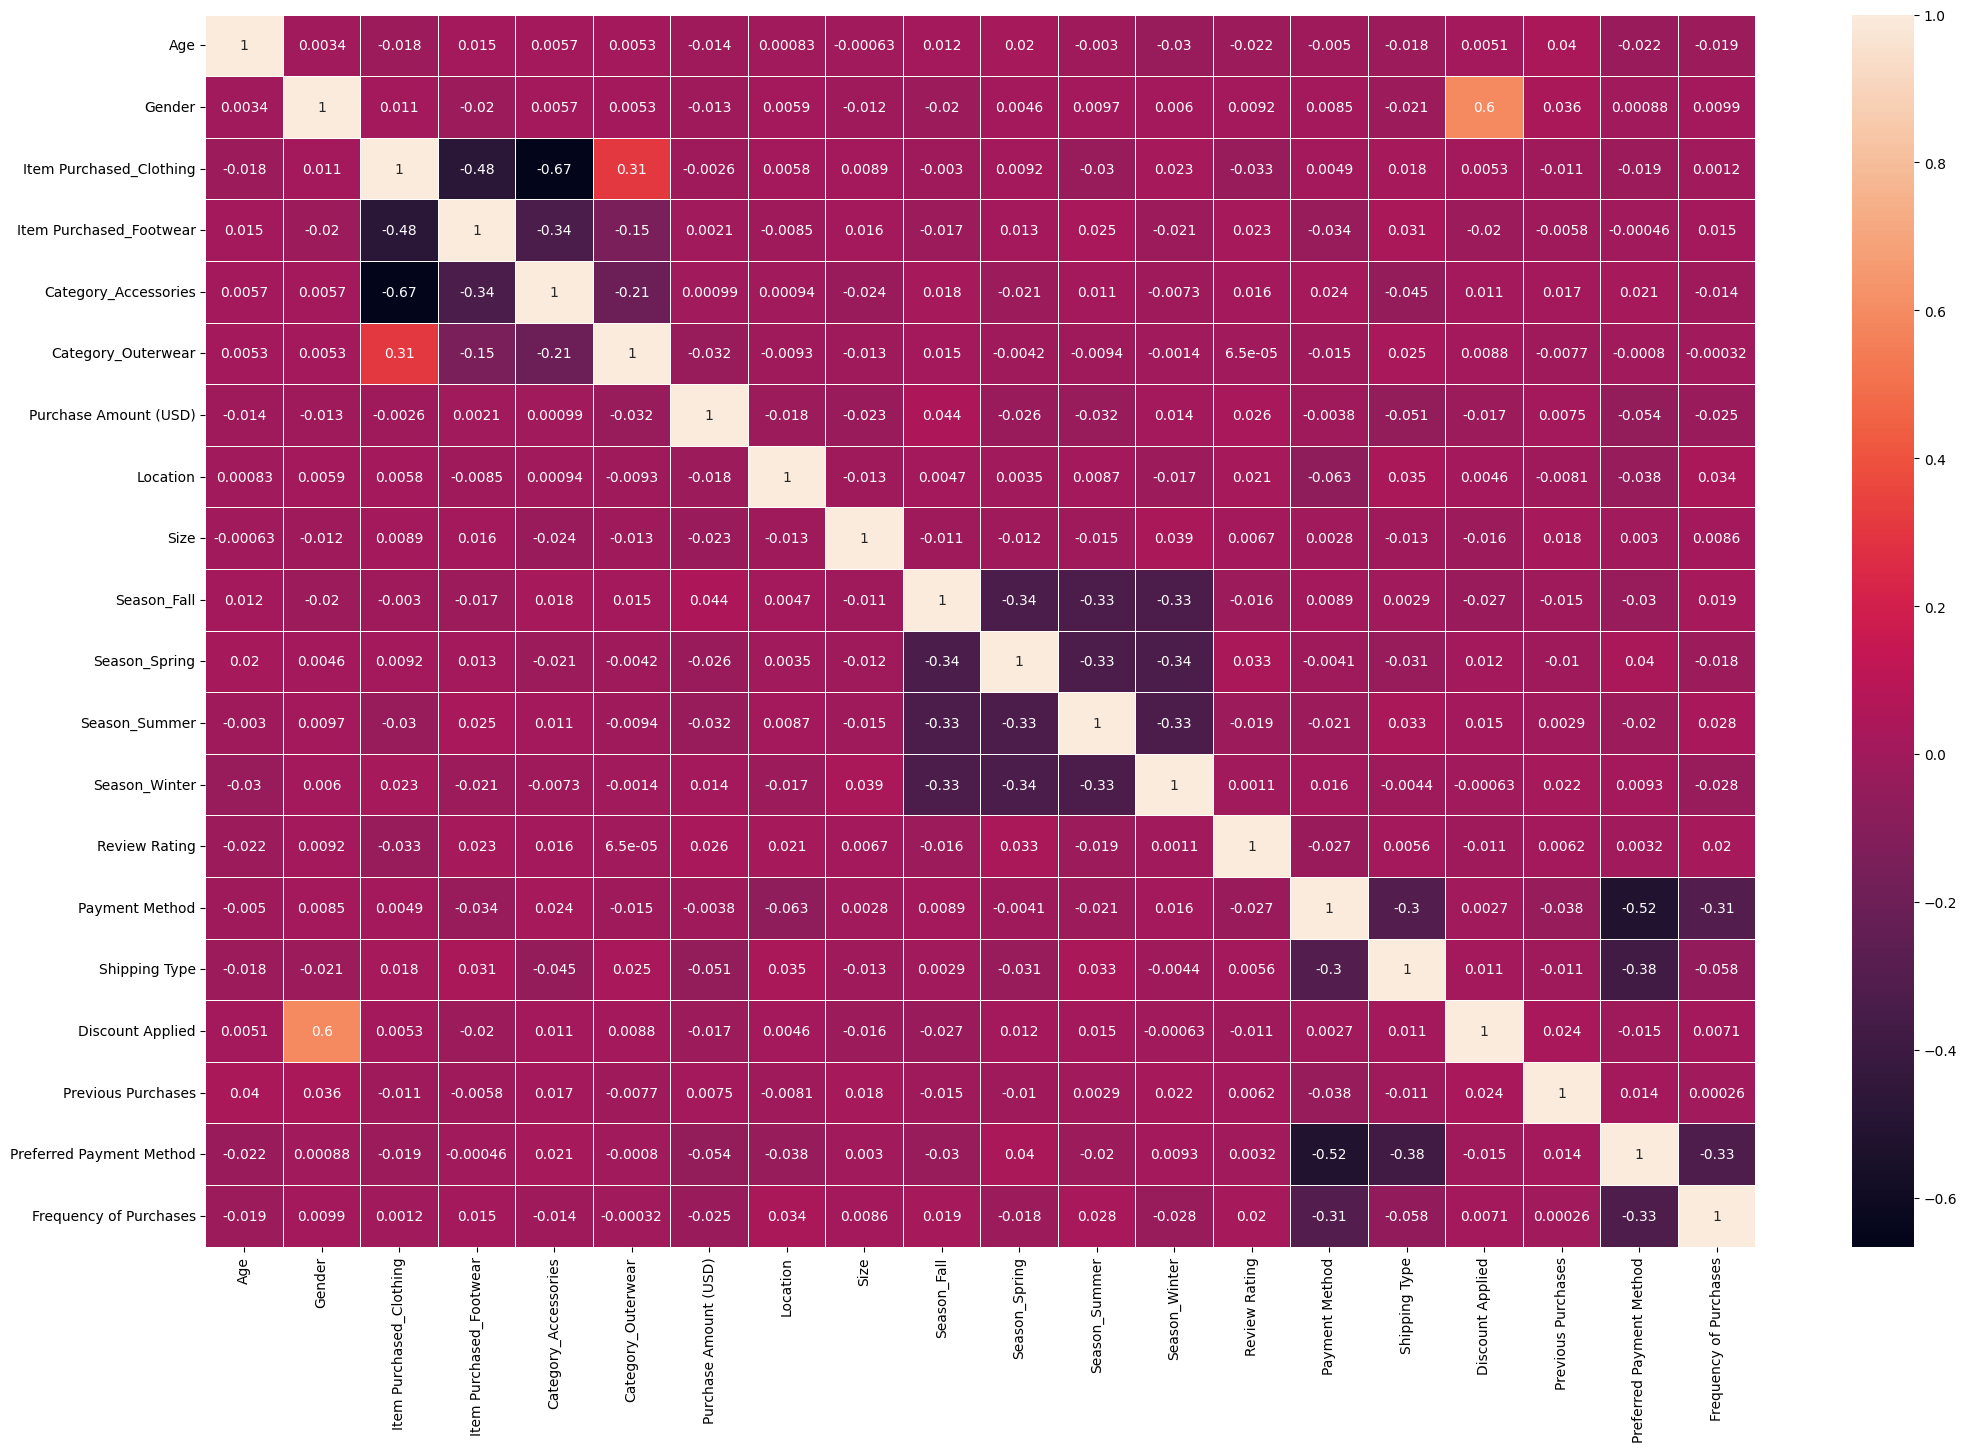

In [63]:
import seaborn as sns
plt.figure(figsize=(25, 16))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()


In [64]:
df.iloc[:5,:10]

,Age,Gender,Item Purchased_Clothing,Item Purchased_Footwear,Category_Accessories,Category_Outerwear,Purchase Amount (USD),Location,Size,Season_Fall
0,0.043013,1,1.0,0.0,0.0,0.0,0.041449,0.061783,2,0.0
1,0.015045,1,1.0,0.0,0.0,0.0,0.050679,0.060974,2,0.0
2,0.038868,1,1.0,0.0,0.0,0.0,0.056748,0.055970,0,0.0
3,0.016521,1,0.0,1.0,0.0,0.0,0.070805,0.049564,1,0.0
4,0.034585,1,1.0,0.0,0.0,0.0,0.037660,0.056874,1,0.0


In [65]:
df.iloc[:5,10:]

,Season_Spring,Season_Summer,Season_Winter,Review Rating,Payment Method,Shipping Type,Discount Applied,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0.0,0.0,1.0,0.002424,0.544313,0.505210,1,0.010949,0.495825,0.423876
1,0.0,0.0,1.0,0.002455,0.500459,0.511545,1,0.001584,0.530550,0.429191
2,1.0,0.0,0.0,0.002410,0.503734,0.524723,1,0.017879,0.521614,0.419001
3,1.0,0.0,0.0,0.002754,0.501929,0.509796,1,0.038549,0.532611,0.424043
4,1.0,0.0,0.0,0.002075,0.498029,0.518780,1,0.023825,0.520317,0.439618


# Elbow Method

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)

In [67]:
df_pca=pd.DataFrame(df_pca,columns=['PCA1','PCA2'])

In [68]:
from sklearn.cluster import KMeans
wcss=[]
K_range=range(2,12)

for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=0,n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

In [69]:
wcss

[2357.561537154715,
 1444.1977363773294,
 898.1435952382578,
 645.3493918709015,
 415.8679835593941,
 258.12357555474586,
 111.52123877939997,
 67.99373370239807,
 42.231165647138965,
 25.753417927767302]

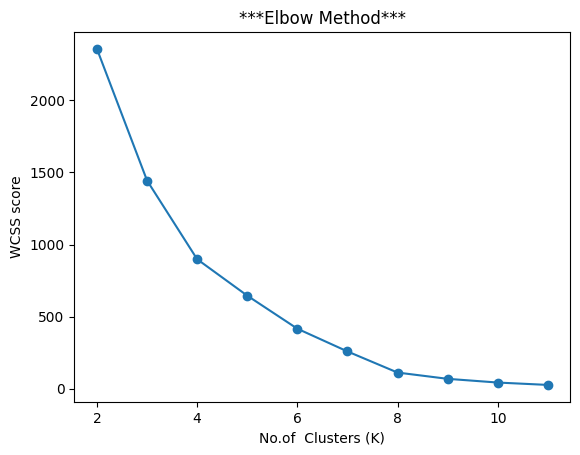

In [70]:
plt.plot(range(2,12),wcss,marker='o')
plt.xlabel("No.of  Clusters (K)")
plt.ylabel("WCSS score")
plt.title("***Elbow Method***")
plt.show()

In [71]:
from sklearn.metrics import silhouette_score
for k in range(2,15):
    km=KMeans(n_clusters=k,random_state=10,n_init=10)
    df_pca['Cluster']=km.fit_predict(df_pca)
    score = silhouette_score(df_pca.iloc[:,:2],df_pca.iloc[:,2])
    print(f"Cluster : {k} Silhouette_score = {score*100:.2f}%")

Cluster : 2 Silhouette_score = 46.92%
Cluster : 3 Silhouette_score = 53.37%
Cluster : 4 Silhouette_score = 61.12%
Cluster : 5 Silhouette_score = 65.71%
Cluster : 6 Silhouette_score = 72.71%
Cluster : 7 Silhouette_score = 77.10%
Cluster : 8 Silhouette_score = 83.03%
Cluster : 9 Silhouette_score = 85.56%
Cluster : 10 Silhouette_score = 87.20%
Cluster : 11 Silhouette_score = 88.24%
Cluster : 12 Silhouette_score = 88.87%
Cluster : 13 Silhouette_score = 82.68%
Cluster : 14 Silhouette_score = 78.81%


# KMeans Model


In [72]:
kmean=KMeans(n_clusters=8,random_state=10,n_init=10)
df_pca['Cluster']=kmean.fit_predict(df_pca.iloc[:,:2])
df['Cluster']=kmean.fit_predict(df_pca.iloc[:,:2])
data['Cluster']=kmean.fit_predict(df_pca.iloc[:,:2])

In [73]:
df_pca.head()

,PCA1,PCA2,Cluster
0,0.705353,0.647113,4
1,0.705346,0.647112,4
2,-1.329262,0.682787,6
3,-0.332841,-0.250872,0
4,-0.330336,0.662203,2


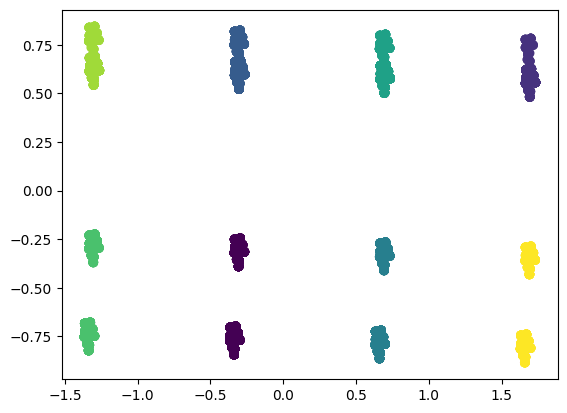

In [74]:
plt.scatter(df_pca['PCA1'],df_pca['PCA2'],c=df_pca['Cluster'],marker='o',cmap='viridis')
plt.show()

# A silhouette score close to 1 means good clustering, 0 means overlapping clusters, and -1 means wrong clustering.

In [75]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_pca.iloc[:,:2],df_pca.iloc[:,2])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8303042817603943


In [76]:
cluster_labels = {
    0: "High Spenders",
    1: "Frequent Buyers",
    2: "Casual Shoppers",
    3: "Discount Seekers",
    4: "Luxury Shoppers",
    5: "New Customers",
    6: "Tech-Savvy Buyers",
    7: "Loyal Customers"
}

In [77]:
data["Cluster_labels"]=data['Cluster'].map(cluster_labels)
df['Cluster_labels']=df['Cluster'].map(cluster_labels)

In [78]:
data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster,Cluster_labels
0,55,1,Clothing,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,4,Luxury Shoppers
1,19,1,Clothing,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,4,Luxury Shoppers
2,50,1,Clothing,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,6,Tech-Savvy Buyers
3,21,1,Footwear,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,High Spenders
4,45,1,Clothing,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,2,Casual Shoppers


In [79]:
data['Cluster_labels'].value_counts()

Cluster_labels
High Spenders        903
Casual Shoppers      852
Luxury Shoppers      534
Discount Seekers     519
New Customers        349
Tech-Savvy Buyers    314
Loyal Customers      227
Frequent Buyers      202
Name: count, dtype: int64

In [80]:
X=df.drop(columns=['Cluster','Cluster_labels'])
Y=df['Cluster']

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=True)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
y_pred=rf.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)

Accuracy :  1.0


array([[286,   0,   0,   0,   0,   0,   0,   0],
       [  0,  51,   0,   0,   0,   0,   0,   0],
       [  0,   0, 250,   0,   0,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0,   0,   0],
       [  0,   0,   0,   0, 152,   0,   0,   0],
       [  0,   0,   0,   0,   0, 104,   0,   0],
       [  0,   0,   0,   0,   0,   0,  90,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67]], dtype=int64)

In [85]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       170
           4       1.00      1.00      1.00       152
           5       1.00      1.00      1.00       104
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00        67

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170

